In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from IPython.display import display

In [9]:
from extract import locm


file = '../experiments/test_twoway_exe.csv'
df = pd.read_csv(file)

success = df[df['exe1'] >=0]

locm_df = success[success['dod'] == 0]
polocm_df = success[success['dod']>0]

base_df = success[success['method'] == 'baseline']
success_polocm_df = polocm_df[polocm_df['method'] == 'polocm']


,lo_id,dod,domain,method,exe1,exe2
9,0,0.1,floortile,baseline,1.0,0.100000
10,0,0.2,floortile,baseline,0.9,0.000000
11,30,0.1,childsnack,baseline,1.0,0.000000
13,30,0.2,childsnack,baseline,1.0,0.000000
14,30,0.3,childsnack,baseline,1.0,0.000000
...,...,...,...,...,...,...
6274,255,0.4,sokoban,polocm,1.0,0.956947
6281,256,0.0,sokoban,polocm,1.0,0.990969
6282,256,0.1,sokoban,polocm,1.0,0.993234
6283,256,0.2,sokoban,polocm,1.0,0.994905


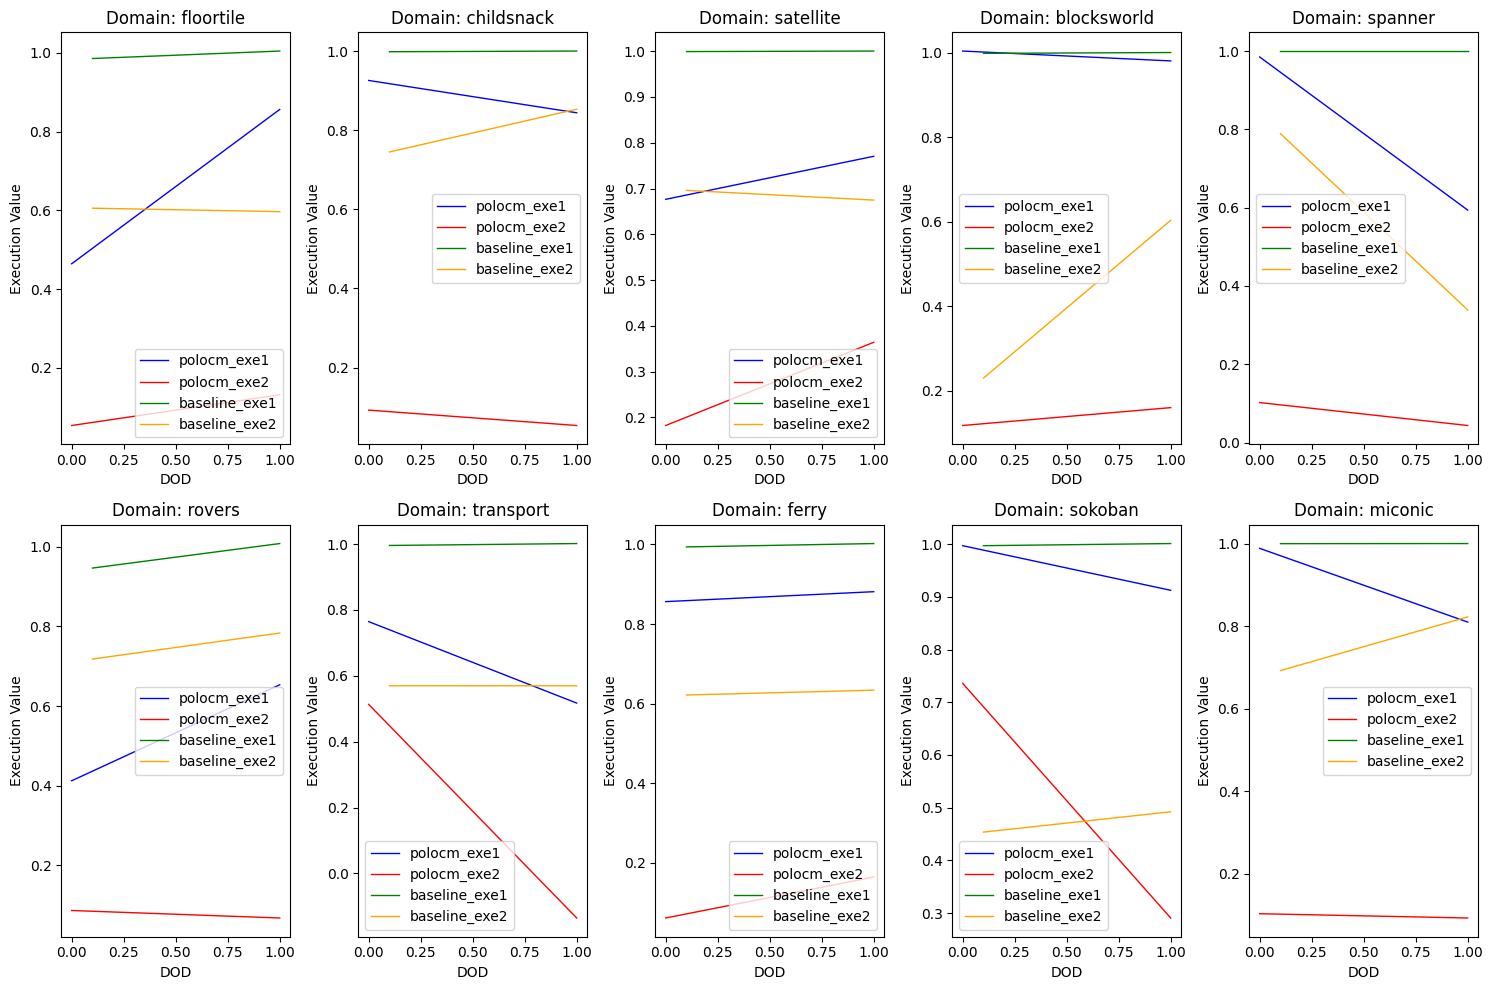

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 假设数据存储在一个名为 data.csv 的文件中
# 你可以根据实际情况修改文件路径



# 获取所有的 domain 列表
domains = success['domain'].unique()


# 设置颜色和标签
colors = ['blue', 'red', 'green', 'orange']
labels = ['polocm_exe1', 'polocm_exe2', 'baseline_exe1', 'baseline_exe2']


# 计算子图的行数和列数
num_domains = len(domains)
num_cols = 5  # 每行的子图数量，可以根据需要调整
num_rows = (num_domains + num_cols - 1) // num_cols


# 创建子图
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))


# 确保 axes 是二维数组
if num_rows == 1:
    axes = axes.reshape(1, -1)


# 遍历每个 domain 并绘图
for i, domain in enumerate(domains):
    ax = axes[i // num_cols, i % num_cols]
    ax.set_title(f'Domain: {domain}')
    ax.set_xlabel('DOD')
    ax.set_ylabel('Execution Value')
    
    # 筛选出当前 domain 的数据
    domain_data = success[success['domain'] == domain]
    success_polocm_df = domain_data[domain_data['method'] == 'polocm']
    base_df = domain_data[domain_data['method'] == 'baseline']
    
    # 绘制四条回归线
    def plot_regression_line(x, y, color, label, ax):
        coefficients = np.polyfit(x, y, 1)
        poly = np.poly1d(coefficients)
        x_sorted = np.sort(x)
        ax.plot(x_sorted, poly(x_sorted), color=color, label=label, linestyle='-', linewidth=1)
    
    # polocm_exe1
    plot_regression_line(success_polocm_df['dod'], success_polocm_df['exe1'], 'blue', 'polocm_exe1', ax)
    # polocm_exe2
    plot_regression_line(success_polocm_df['dod'], success_polocm_df['exe2'], 'red', 'polocm_exe2', ax)
    # baseline_exe1
    plot_regression_line(base_df['dod'], base_df['exe1'], 'green', 'baseline_exe1', ax)
    # baseline_exe2
    plot_regression_line(base_df['dod'], base_df['exe2'], 'orange', 'baseline_exe2', ax)
    
    # 添加图例
    ax.legend()


# 调整布局
plt.tight_layout()


# 显示图形
plt.show()

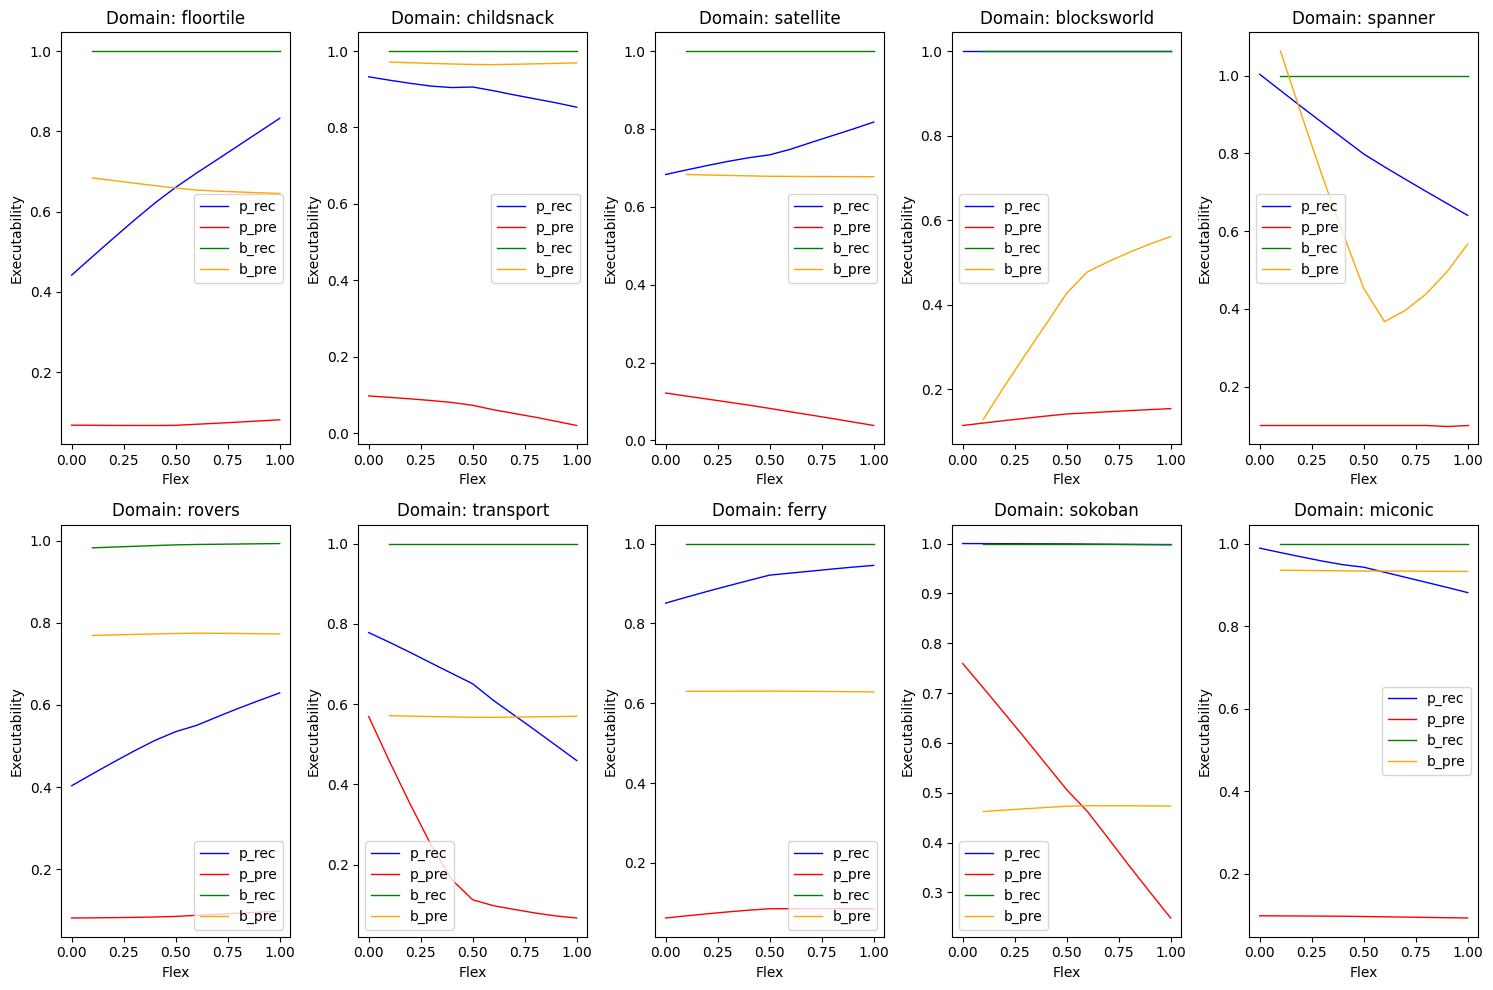

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


# 假设数据存储在一个名为 data.csv 的文件中
# 你可以根据实际情况修改文件路径
data = success


# 获取所有的 domain 列表
domains = data['domain'].unique()


# 设置颜色和标签
colors = ['blue', 'red', 'green', 'orange']
labels = ['polocm_exe1', 'polocm_exe2', 'baseline_exe1', 'baseline_exe2']


# 计算子图的行数和列数
num_domains = len(domains)
num_cols = 5  # 每行的子图数量，可以根据需要调整
num_rows = (num_domains + num_cols - 1) // num_cols


# 创建子图
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))


# 确保 axes 是二维数组
if num_rows == 1:
    axes = axes.reshape(1, -1)


# 遍历每个 domain 并绘图
for i, domain in enumerate(domains):
    ax = axes[i // num_cols, i % num_cols]
    ax.set_title(f'Domain: {domain}')
    ax.set_xlabel('Flex')
    ax.set_ylabel('Executability')
    
    # 筛选出当前 domain 的数据
    domain_data = data[data['domain'] == domain]
    success_polocm_df = domain_data[domain_data['method'] == 'polocm']
    base_df = domain_data[domain_data['method'] == 'baseline']
    
    # 绘制四条平滑回归线
    def plot_lowess_line(x, y, color, label, ax):
        lowess = sm.nonparametric.lowess(y, x, frac=1)  # frac 参数可以调整平滑程度，可根据需要调整
        ax.plot(lowess[:, 0], lowess[:, 1], color=color, label=label, linestyle='-', linewidth=1)
    
    # polocm_exe1
    plot_lowess_line(success_polocm_df['dod'], success_polocm_df['exe1'], 'blue', 'p_rec', ax)
    # polocm_exe2
    plot_lowess_line(success_polocm_df['dod'], success_polocm_df['exe2'], 'red', 'p_pre', ax)
    # baseline_exe1
    plot_lowess_line(base_df['dod'], base_df['exe1'], 'green', 'b_rec', ax)
    # baseline_exe2
    plot_lowess_line(base_df['dod'], base_df['exe2'], 'orange', 'b_pre', ax)
    
    # 添加图例
    ax.legend()


# 调整布局
plt.tight_layout()


# 显示图形
plt.show()